<a href="https://colab.research.google.com/github/SourabhiDunung/Water_Safety_Prediction/blob/main/Water_Quality_Prediction_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Tree**

**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Reading the dataset**

In [ ]:
Data=pd.read_csv("/content/waterQuality (3).csv")

In [ ]:
Data

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65     9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32    21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01    14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36    11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92    24.33     0.03    0.20    0.006        2.67      0.69   
...         ...      ...      ...     ...      ...         ...       ...   
7994       0.05     7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05    24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09     6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01    10.00     0.01    2.00    0.000        2.00      0.00   
7998       0.04     6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           37.75    6.78      0.08    0.34     0.02        1  
1           32.26    3.21      0.08    0.27     0.05        1  
2           50.28    7.07      0.07    0.44     0.01        0  
3            9.12    1.72      0.02    0.45     0.05        1  
4           16.90    2.41      0.02    0.06     0.02        1  
...           ...     ...       ...     ...      ...      ...  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[7999 rows x 21 columns]

**Normalization of the Data**

In [ ]:
from sklearn.datasets import load_iris
d=load_iris()
x=d['data']
print(d)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit_transform(x)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x) #mean=0,variance=1

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

**Data Collection and processing**

In [ ]:
Data.head()

aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  

[5 rows x 21 columns]

In [ ]:
import plotly.express as px     #Library used for developing high level customised visualization.

#color palette
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

#Extract the value counts from the 'is_safe' column from the dataset using value_counts() which returns the count of unique entries in that column.
d = Data['is_safe'].value_counts()

#The data for the chart is d
#The values to plot are 'is_safe'
#The names of the categories are ['is_notsafe', 'is_safe']
#The hole in the center of the chart is 0.4
#The opacity of the chart is 0.7
#The colors for the two categories are specified using color_discrete_sequence

fig = px.pie(d,values='is_safe',names=['Not Safe','Safe'],hole=0.4,opacity=0.7,color_discrete_sequence=[colors_green[3],colors_blue[3]])

#Using the add_annotation function the chart is then annotated with the text 'is safe', it's position, size, opacity, font.

fig.add_annotation(text='Safe',x=0.5,y=0.5,showarrow=False,font_size=18,opacity=0.7,font_family='monospace')

#Using the update_layout function the title, it's font,position,color,size is updated.
#Also the position, orientation(here horizontal), trace order of legend('safe' & 'Not safe') is determined.

fig.update_layout(font_family='monospace',title=dict(text='Q. How many samples of water is Safe for Drinking?',x=0.47,y=0.97,
    font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'))

#Here using update_traces function the position of text and percentage is placed outside.

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [ ]:
# Iterate over each column (feature) in the dataset
for column in Data.columns:
    fig = px.histogram(data_frame=Data, x=column, title=f"Histogram of {column}")
    fig.show()

**Feature Selection**

In [ ]:
# Calculate correlation matrix
Data.corr()


aluminium   ammonia   arsenic    barium   cadmium  chloramine  \
aluminium     1.000000  0.067635  0.225773  0.294145 -0.099911    0.369309   
ammonia       0.067635  1.000000  0.046962  0.070342 -0.006538    0.105187   
arsenic       0.225773  0.046962  1.000000  0.362945  0.334682    0.356559   
barium        0.294145  0.070342  0.362945  1.000000 -0.037803    0.446928   
cadmium      -0.099911 -0.006538  0.334682 -0.037803  1.000000   -0.144370   
chloramine    0.369309  0.105187  0.356559  0.446928 -0.144370    1.000000   
chromium      0.353218  0.125149  0.312475  0.415972 -0.157766    0.555938   
copper        0.168612  0.016149 -0.036444  0.065426 -0.109024    0.119059   
flouride     -0.009784 -0.027908  0.003792 -0.018548  0.004880    0.004400   
bacteria     -0.078238  0.063800  0.035688  0.101259 -0.092431    0.154510   
viruses      -0.070863  0.106313  0.011703 -0.002276  0.021183    0.003687   
lead          0.020792 -0.037558 -0.087756 -0.042888 -0.034959   -0.030479   
nitrates     -0.003810  0.006603  0.027554 -0.011331  0.020194   -0.001551   
nitrites      0.237307 -0.063595  0.305005  0.312711 -0.015682    0.379685   
mercury      -0.003306  0.020300 -0.015404  0.005987 -0.016174   -0.021472   
perchlorate   0.363069  0.091325  0.332279  0.462234 -0.149344    0.588769   
radium        0.243217  0.050058  0.218204  0.286569 -0.099259    0.388806   
selenium     -0.003672  0.029804 -0.007009  0.035242  0.010145    0.011399   
silver        0.334993  0.075846  0.307837  0.431606 -0.155408    0.522447   
uranium       0.014711  0.014581  0.001455 -0.002440 -0.005633   -0.007658   
is_safe       0.333654 -0.023312 -0.123379  0.090520 -0.256351    0.186372   

             chromium    copper  flouride  bacteria  ...      lead  nitrates  \
aluminium    0.353218  0.168612 -0.009784 -0.078238  ...  0.020792 -0.003810   
ammonia      0.125149  0.016149 -0.027908  0.063800  ... -0.037558  0.006603   
arsenic      0.312475 -0.036444  0.003792  0.035688  ... -0.087756  0.027554   
barium       0.415972  0.065426 -0.018548  0.101259  ... -0.042888 -0.011331   
cadmium     -0.157766 -0.109024  0.004880 -0.092431  ... -0.034959  0.020194   
chloramine   0.555938  0.119059  0.004400  0.154510  ... -0.030479 -0.001551   
chromium     1.000000  0.113043 -0.002284  0.142041  ... -0.050501 -0.012793   
copper       0.113043  1.000000  0.011683  0.149110  ...  0.121765  0.002332   
flouride    -0.002284  0.011683  1.000000  0.014134  ...  0.011905 -0.008140   
bacteria     0.142041  0.149110  0.014134  1.000000  ... -0.027525 -0.033920   
viruses      0.002430  0.006292  0.018418  0.618480  ...  0.017598 -0.044544   
lead        -0.050501  0.121765  0.011905 -0.027525  ...  1.000000  0.034978   
nitrates    -0.012793  0.002332 -0.008140 -0.033920  ...  0.034978  1.000000   
nitrites     0.335708  0.162093 -0.016669  0.246252  ... -0.052405  0.016936   
mercury     -0.022787  0.017626 -0.004400 -0.004471  ... -0.007832 -0.020458   
perchlorate  0.524532  0.104564 -0.016191  0.147652  ... -0.027709 -0.014020   
radium       0.315271  0.026215  0.007688  0.099298  ... -0.048741 -0.021410   
selenium     0.030539 -0.003267  0.022629 -0.006971  ...  0.031888  0.043109   
silver       0.510768  0.089333  0.014554  0.148225  ... -0.057351  0.005218   
uranium     -0.005526  0.006978  0.016792  0.044839  ... -0.009151  0.000824   
is_safe      0.182066  0.029078  0.006566 -0.021711  ... -0.010156 -0.072049   

             nitrites   mercury  perchlorate    radium  selenium    silver  \
aluminium    0.237307 -0.003306     0.363069  0.243217 -0.003672  0.334993   
ammonia     -0.063595  0.020300     0.091325  0.050058  0.029804  0.075846   
arsenic      0.305005 -0.015404     0.332279  0.218204 -0.007009  0.307837   
barium       0.312711  0.005987     0.462234  0.286569  0.035242  0.431606   
cadmium     -0.015682 -0.016174    -0.149344 -0.099259  0.010145 -0.155408   
chloramine   0.379685 -0.021472     0.588769  0.388806  0.011399  0

#Feature Selection
feature_coloum=['a','b','c','d','e','f','g','h','i','j']
x=Data.iloc[:,[0,15,4,2,18,1,19,12,5,16]].values
y=Data.iloc[:,20]
print(x)

In [ ]:
feature_coloum=['a','b','c','d','e','f','g','h','i','j']
x=Data.iloc[:,[0,15,4,2,18,1,19,12,5,16]].values
y=Data.iloc[:,20]
print(x)

[[1.650e+00 3.775e+01 7.000e-03 ... 1.608e+01 3.500e-01 6.780e+00]
 [2.320e+00 3.226e+01 2.000e-03 ... 2.010e+00 5.280e+00 3.210e+00]
 [1.010e+00 5.028e+01 8.000e-03 ... 1.416e+01 4.240e+00 7.070e+00]
 ...
 [9.000e-02 1.350e+00 3.000e-02 ... 1.592e+01 5.000e-02 4.840e+00]
 [1.000e-02 0.000e+00 0.000e+00 ... 0.000e+00 2.000e+00 0.000e+00]
 [4.000e-02 1.350e+00 3.000e-02 ... 1.592e+01 5.000e-02 4.840e+00]]


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
importances = model.feature_importances_
print(model.feature_importances_)


[0.22818255 0.15933689 0.12590499 0.12479532 0.08082772 0.07816568
 0.05393632 0.05353011 0.04597241 0.04934801]


In [ ]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
7994    1
7995    1
7996    1
7997    1
7998    1
Name: is_safe, Length: 7999, dtype: int64


**Splitting the dataset**

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train)


[[2.200e-01 8.810e+00 9.000e-02 ... 1.603e+01 3.200e-01 3.550e+00]
 [1.860e+00 3.906e+01 1.000e-03 ... 4.940e+00 5.650e+00 7.510e+00]
 [4.910e+00 6.870e+00 5.000e-03 ... 8.900e+00 5.220e+00 5.770e+00]
 ...
 [2.000e-02 3.726e+01 8.000e-02 ... 1.384e+01 4.940e+00 3.340e+00]
 [1.400e+00 2.973e+01 8.000e-03 ... 1.899e+01 8.300e-01 6.880e+00]
 [2.000e-02 6.990e+00 6.000e-02 ... 1.157e+01 8.000e-02 7.700e-01]]


**Model Selection**

In [ ]:
#Fit model in decision tree
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier=Classifier.fit(x_train,y_train)


**Testing and Evaluation of the model**

In [ ]:
#Make predictions and check Accuracy
y_pred= Classifier.predict(x_test)
from sklearn import metrics
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.9354166666666667


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
print('Decision Tree Classification model accuracy (in %) :',metrics.accuracy_score(y_test,y_pred)*100)

Decision Tree Classification model accuracy (in %) : 93.54166666666667


**Confusion Matrix**

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[2055   80]
 [  75  190]]


**Visualization Of the tree**

In [ ]:
#Visualize the Tree
from sklearn.tree import export_graphviz

In [ ]:
 !pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 from six import StringIO

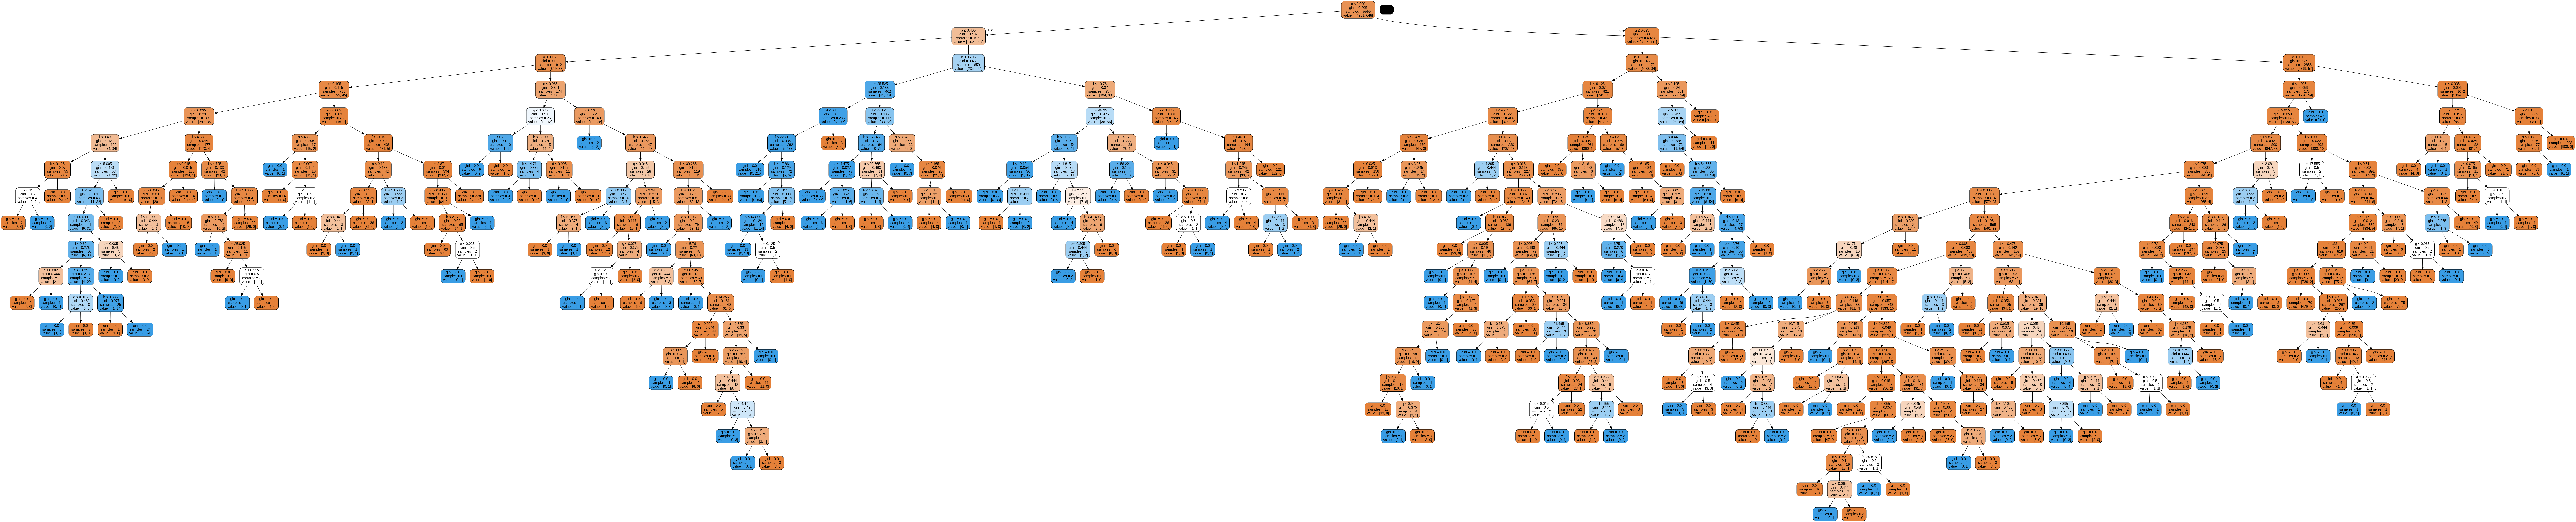

In [ ]:
from IPython.display import Image
import pydotplus
data=StringIO()
export_graphviz(Classifier,out_file=data,filled=True,rounded=True,special_characters=True,feature_names=feature_coloum,
                )
graph=pydotplus.graph_from_dot_data(data.getvalue())
Image(graph.create_png())

**Optimizing the decision Tree**

In [ ]:
#Optimizing decision Tree
Classifier=DecisionTreeClassifier(criterion="gini",max_depth=3)
Classifier=Classifier.fit(x_train,y_train)
y_pred=Classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.9391666666666667


In [ ]:
import pandas as pd

# Load data
data = pd.read_csv("/content/waterQuality (3).csv")

# Separate target variable
Target = data['is_safe']

# Calculate proportion of each class in the target variable
class_proportions = Target.value_counts(normalize=True)

# Calculate Gini index
gini_index = 1 - sum(class_proportions ** 2)

print("Gini index:", gini_index)


Gini index: 0.20222299008778766


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
print('Decision Tree Classification model accuracy (in %) :',metrics.accuracy_score(y_test,y_pred)*100)

Decision Tree Classification model accuracy (in %) : 93.91666666666667


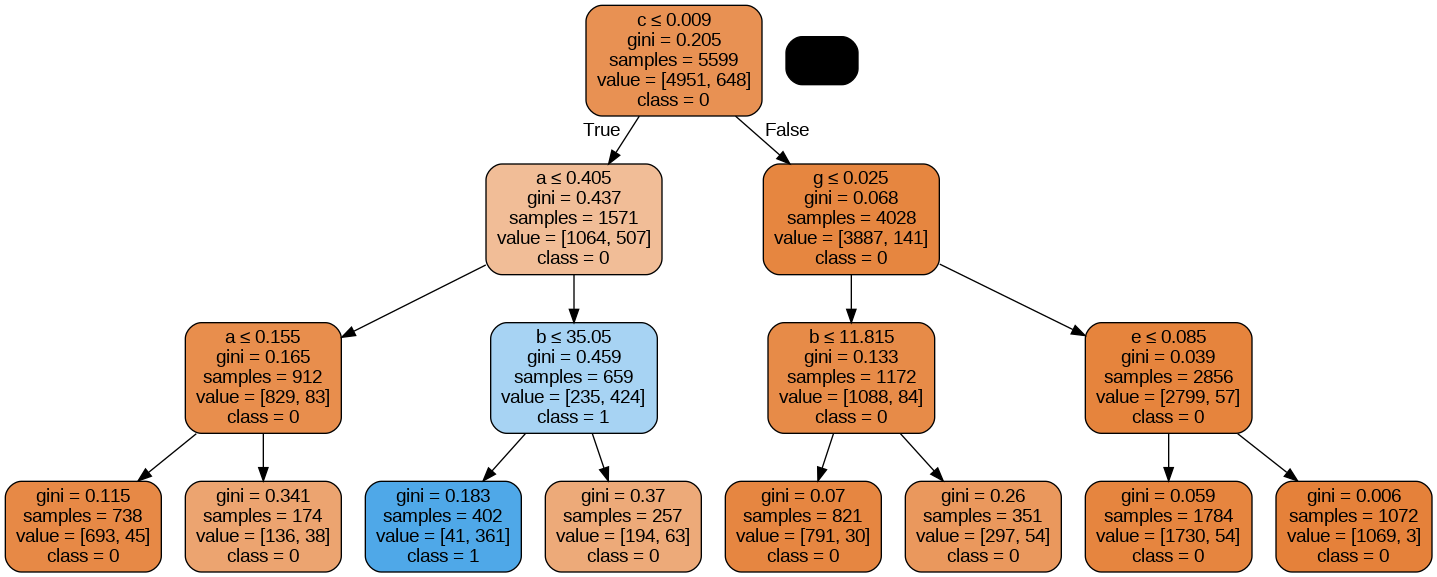

In [ ]:
#Visualize the Tree
dot_Data=StringIO()
export_graphviz(Classifier, out_file=dot_Data, filled=True, rounded=True,special_characters=True, feature_names=feature_coloum,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_Data.getvalue())
Image(graph.create_png())


**USING LOGISTIC Regression**

In [ ]:
#Build logistic regression model using training data
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred2=model2.predict(x_test)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [ ]:
#predict the probability of each test sample belonging to a particular class
model2.predict_proba(x_test)

array([[0.92636309, 0.07363691],
       [0.97049192, 0.02950808],
       [0.94306128, 0.05693872],
       ...,
       [0.99372505, 0.00627495],
       [0.91854093, 0.08145907],
       [0.93506525, 0.06493475]])

In [ ]:
cm=confusion_matrix(y_test,y_pred2)
print(cm)

[[2075   60]
 [ 197   68]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2135
           1       0.53      0.26      0.35       265

    accuracy                           0.89      2400
   macro avg       0.72      0.61      0.64      2400
weighted avg       0.87      0.89      0.88      2400



In [ ]:
from sklearn import metrics
print('Logistic Regression accuracy (in %) :',metrics.accuracy_score(y_test,y_pred2)*100)

Logistic Regression accuracy (in %) : 89.29166666666667


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2135
           1       0.53      0.26      0.35       265

    accuracy                           0.89      2400
   macro avg       0.72      0.61      0.64      2400
weighted avg       0.87      0.89      0.88      2400



**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()

In [ ]:
model3.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred3 = model3.predict(x_test)

In [ ]:
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy (in %) :',metrics.accuracy_score(y_test,y_pred3)*100)

Gaussian Naive Bayes model accuracy (in %) : 87.5


In [ ]:
cm=confusion_matrix(y_test,y_pred3)
print(cm)

[[1958  177]
 [ 123  142]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2135
           1       0.45      0.54      0.49       265

    accuracy                           0.88      2400
   macro avg       0.69      0.73      0.71      2400
weighted avg       0.89      0.88      0.88      2400

